Iris Data set-UCI

Model


In [1]:
import torch
import torch.nn as nn #torches neural network
import torch.nn.functional as forward #helps moves our data forward through layers

In [2]:
#Model class that inherits nn.Module
class Model(nn.Module):

  #Input layers = 4 features of the flower -> hidden layer(HL) #1 = has some num of neurons(#n) -> HL2=#n -> output =which class of flower
  def __init__(self,input_Features=4, h1=8, h2=9, output_features=3): #(initalize, idenifying features, hidden layer 1 with 8 neurons, can only have three outputs)
    super().__init__()#represents our nn.Modular
    self.layer1=nn.Linear(input_Features, h1) #input to h1
    self.layer2=nn.Linear(h1,h2)#h1 to h2
    self.out=nn.Linear(h2,output_features)

  #move forward through the layers
  def move(self, x):
    x=forward.relu(self.layer1(x)) #relu = if outcome x<0=0 otherwise give num
    x=forward.relu(self.layer2(x))#moving from 1 -> 2
    x=self.out(x)

    return x



In [3]:
#random state = before splitting data is randomly shuffled when run code again = diffrent shuffle/ training data= diffrent  output
#results change everytime this allows for same shuffle -> can effect how good reulst r
torch.manual_seed(20)

#initialize/turn on
model=Model()



In [4]:
import pandas as pd #load data->PyTorch doesnt understand panda dataframe needs Tensor
import matplotlib.pyplot as plt #plot
#import plot directly inside notebook
%matplotlib inline

In [5]:
#url to load data=data frame
url='https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
dataFrame=pd.read_csv(url)

In [6]:
dataFrame #.head() or tail() get the first or last five things

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Rid of the last colume and convert string to float or int-> best for machine learning

In [7]:
dataFrame['species']=dataFrame['species'].replace('setosa',0)
dataFrame['species']=dataFrame['species'].replace('versicolor',1)
dataFrame['species']=dataFrame['species'].replace('virginica',2)

#convert to int
dataFrame['species'] = dataFrame['species'].astype(int)

dataFrame

/tmp/ipython-input-2977863494.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataFrame['species']=dataFrame['species'].replace('virginica',2)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Train/ Test/ Split


In [8]:
#set x=feature(first three rows),y(outcome)
X=dataFrame.drop('species',axis=1).values #feature x determine y -> distingish between them->1=colume/0=row
y=dataFrame['species'].values #set y as the species


In [9]:
#convert to numpy arrays
type(X) #if not numpy -> X=X.values
type(y)
X


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

Train Test Split


In [10]:
#split data into Training set & Test set (evaluates how well the model performs)
from sklearn.model_selection import train_test_split

In [11]:
#X_train=training input(flower measurements used for learning)
#Y_train=traing outputs (correct speices for those flowers)
#X_test=testing inputs (new flowers measuremnets)
#Y_test=testing outputs (correct answers that we compare against predicted)
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2,random_state=20) #set to what we imported -> test size =20% training size=80%-> 41 (not nesscicary) insure same randomization

In [12]:
#convert numpy->Tesor
X_train=torch.FloatTensor(X_train)

X_test=torch.FloatTensor(X_test)

y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)



In [13]:
#critera of model to measure teh error or how far off the prodiction was
critera=nn.CrossEntropyLoss()

#optimizer= adjusts the models parameters -> use Adam optimizers
#learning rate(lr)= how big the adjustment is->if error doesnt decrease as we learn through iterations(epochs)->lower learing rate (learns more carfully)

optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

model.parameters


<bound method Module.parameters of Model(
  (layer1): Linear(in_features=4, out_features=8, bias=True)
  (layer2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

Train Model


In [14]:
#epochs-> 1 run data through our network
epoch=200
losses=[] #keep track of errors->should decrese overtime = learning
for i in range(epoch):
  #move forward and output prediction
  y_pred=model.move(X_train)

  #measure loss
  loss=critera(y_pred, y_train) #prediction vs train
  losses.append(loss.detach().numpy())#Tensor->numpy to graph later

  #print every 10 epoch -> see data output as it runs
  if i%10==0:
    print(f'Epoch:{i} and loss:{loss}')

  #back preagation= take the error rate and give back to the network for fine tuing teh weights(numbers that determine how it makes predictiosn-> which numbers matter the most)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()




Epoch:0 and loss:1.1048375368118286
Epoch:10 and loss:0.8352535963058472
Epoch:20 and loss:0.5333452224731445
Epoch:30 and loss:0.3803027868270874
Epoch:40 and loss:0.2783735394477844
Epoch:50 and loss:0.19204112887382507
Epoch:60 and loss:0.1263255476951599
Epoch:70 and loss:0.09083087742328644
Epoch:80 and loss:0.07346073538064957
Epoch:90 and loss:0.0639343112707138
Epoch:100 and loss:0.057947274297475815
Epoch:110 and loss:0.05373363196849823
Epoch:120 and loss:0.05051339790225029
Epoch:130 and loss:0.047906164079904556
Epoch:140 and loss:0.04570659250020981
Epoch:150 and loss:0.04379027709364891
Epoch:160 and loss:0.042078688740730286
Epoch:170 and loss:0.04052296653389931
Epoch:180 and loss:0.0390937514603138
Epoch:190 and loss:0.03777473419904709


Graph


Text(0.5, 0, 'Epoch')

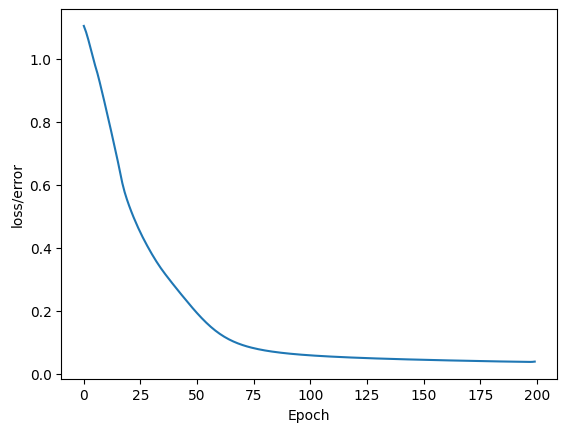

In [15]:
plt.plot(range(epoch), losses)
plt.ylabel("loss/error")
plt.xlabel("Epoch")

#evenout= learn -> if not= increase epoch or change Ir

Evaluating Model on Test Data set

In [16]:
with torch.no_grad(): #send test data into model but dont need to chnage weights -> turns off back propgation
  y_eval=model.move(X_test)#X_test are features from test set and y_eval= predictions
  loss-critera(y_eval, y_test) #find loss/ error
  print(loss)

tensor(0.0381, grad_fn=<NllLossBackward0>)


In [17]:
correct=0
#loop thro test data making predictions with the model to count which ones we got correct
with torch.no_grad(): #not training so dont need to update weights
  for i, data in enumerate(X_test): #through every test sample -> data= row in X_test/feaures
    y_val=model.move(data) #test sample into model

    if y_test[i]==0:
      x="Setosa"
    elif y_test[i]==1:
      x='Versicolor'
    else:
      x='virginica'

#what type of flower the network thinks it is --> put x instead of y_test[i] for flower name
    print(f"{i+1}, {str(y_val)} \t \t {y_test[i]} \t{y_val.argmax().item()}")
    #(each test sample),tensor([0=setosa ,1=versicolor, 2=virginica]), prediction, actrual)

    #correct or not
    if y_val.argmax().item()==y_test[i]:
      correct+=1
    print(f'number of correct {correct} of 30')



1, tensor([ 13.4711,   5.9644, -21.9942]) 	 	 0 	0
number of correct 1 of 30
2, tensor([-2.3028,  7.7545, -0.5314]) 	 	 1 	1
number of correct 2 of 30
3, tensor([-0.7795,  8.1194, -2.9014]) 	 	 1 	1
number of correct 3 of 30
4, tensor([-6.0064,  6.4827,  5.7725]) 	 	 2 	1
number of correct 3 of 30
5, tensor([ 0.7008,  7.9327, -4.9899]) 	 	 1 	1
number of correct 4 of 30
6, tensor([-2.0125,  6.9525, -0.5038]) 	 	 1 	1
number of correct 5 of 30
7, tensor([-10.0889,   3.3275,  13.6681]) 	 	 2 	2
number of correct 6 of 30
8, tensor([ 14.1852,   6.3992, -23.2459]) 	 	 0 	0
number of correct 7 of 30
9, tensor([-8.5856,  4.0661, 10.9808]) 	 	 2 	2
number of correct 8 of 30
10, tensor([ 13.7344,   5.9897, -22.3549]) 	 	 0 	0
number of correct 9 of 30
11, tensor([-7.1519,  4.7401,  8.4791]) 	 	 2 	2
number of correct 10 of 30
12, tensor([-2.8185,  7.7737,  0.2944]) 	 	 1 	1
number of correct 11 of 30
13, tensor([-6.0132,  4.8826,  6.6497]) 	 	 2 	2
number of correct 12 of 30
14, tensor([ 14.147

Feed new data to make predictions


In [18]:
#create new dat point -> ex: petal_length can be 1.4 -assuming we know the data points
new_iris=torch.tensor([4.7,3.2,1.3,0.2])

In [19]:
with torch.no_grad():
  print(model.move(new_iris))

  #biggest number is at i spot = veriscolor

tensor([ 13.6658,   5.9600, -22.2444])


Save and load


In [20]:
#save
torch.save(model.state_dict(),'iris_model.pt')

In [21]:
#load the saved model
new_model=Model() #class
new_model.load_state_dict(torch.load('iris_model.pt'))

<All keys matched successfully>

In [22]:
#insure loaded correcly
new_model.eval()

Model(
  (layer1): Linear(in_features=4, out_features=8, bias=True)
  (layer2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)